In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')

In [8]:
df.shape

(1467832, 63)

In [9]:
df.head(10)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
5,2.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
8,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
9,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_38,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0


In [10]:
df.columns.values

array(['total_sessions_day0', 'total_sessions_day1',
       'total_sessions_day3', 'total_sessions_day7',
       'chapters_finished_day0', 'chapters_finished_day1',
       'chapters_finished_day3', 'chapters_finished_day7',
       'chapters_opened_day0', 'chapters_opened_day1',
       'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1',
       'chapters_closed_day3', 'chapters_closed_day7',
       'diamonds_received_day0', 'diamonds_received_day1',
       'diamonds_received_day3', 'diamonds_received_day7',
       'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_op

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [4]:
df.describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,1.466467e+06,1.466465e+06,1.466464e+06,1.466458e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,...,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06
mean,1.847298e+00,2.193912e+00,2.608979e+00,3.113484e+00,1.234763e+00,1.498150e+00,1.772233e+00,2.055170e+00,2.099693e+00,2.382293e+00,...,1.022759e-01,1.261447e-01,1.496395e-01,8.968177e-03,1.090574e-02,1.325368e-02,2.203037e-02,2.139268e-01,2.091572e-02,2.568728e-01
std,2.530825e+00,3.621980e+00,5.347342e+00,7.888102e+00,3.048333e+00,3.975010e+00,5.033945e+00,6.325564e+00,3.117375e+00,4.077269e+00,...,7.672101e-01,9.683484e-01,1.176394e+00,4.453546e-02,6.009280e-02,7.472105e-02,3.088758e-01,2.097916e+00,1.601929e-01,2.274466e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.829604e+00,0.000000e+00,0.000000e+00,-2.777195e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.710000e+02,7.710000e+02,7.710000e+02,9.050000e+02,7.300000e+01,3.590000e+02,3.600000e+02,3.600000e+02,7.700000e+01,3.600000e+02,...,4.621191e+01,1.391509e+02,1.391509e+02,3.782356e+00,1.974900e+01,1.997062e+01,4.545741e+01,2.687878e+02,3.393084e+01,2.720042e+02


In [13]:
df.isnull().sum()


total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64

In [14]:
df = df.fillna(0)
df.isnull().sum().sum()

0

In [ ]:
df.describe()

In [15]:
df.describe(include=[object])

,media_source,install_date,country_code,platform
count,1467832,1467832,1467832,1467832
unique,24,62,224,2
top,SOURCE_4,2021-12-30,COUNTRY_141,android
freq,728958,94101,387761,887426


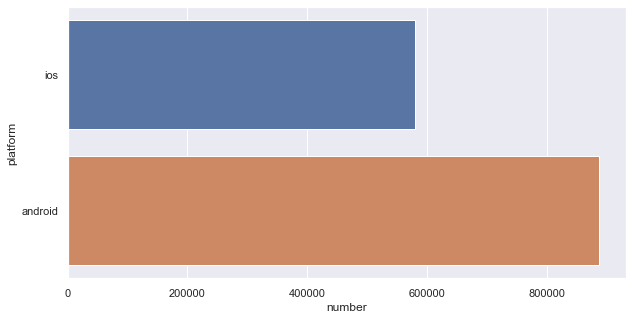

In [16]:
sns.set_theme()
plt.figure(figsize = (10, 5))
sns.countplot(y='platform',data=df)
plt.xlabel('number')
plt.ylabel('platform')
plt.show()

In [6]:
!pip install category_encoders
import category_encoders as ce

You should consider upgrading via the 'c:\users\iliya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [26]:
#cat_vars = ["media_source", "install_date",  "country_code",  "platform"]
cat_vars = ["media_source",  "country_code",  "platform"]
num_vars = ["total_sessions_day0", "total_sessions_day1", "total_sessions_day3", "total_sessions_day7",
            "chapters_finished_day0", "chapters_finished_day1", "chapters_finished_day3", "chapters_finished_day7",
            "chapters_opened_day0", "chapters_opened_day1", "chapters_opened_day3", "chapters_opened_day7",
            "chapters_closed_day0", "chapters_closed_day1", "chapters_closed_day3", "chapters_closed_day7",
            "diamonds_received_day0", "diamonds_received_day1", "diamonds_received_day3", "diamonds_received_day7",
            "diamonds_spent_day0", "diamonds_spent_day1", "diamonds_spent_day3", "diamonds_spent_day7",
            "tickets_spent_day0", "tickets_spent_day1", "tickets_spent_day3", "tickets_spent_day7", 
            "chapters_finished_session1", "chapters_finished_session3", "chapters_finished_session9",
            "chapters_opened_session1", "chapters_opened_session3", "chapters_opened_session9",
            "chapters_closed_session1", "chapters_closed_session3", "chapters_closed_session9",
            "diamonds_spent_session1", "diamonds_spent_session3", "diamonds_spent_session9",
            "tickets_spent_session1", "tickets_spent_session3", "tickets_spent_session9",
            "app_sub_ltv_day0", "app_sub_ltv_day1", "app_sub_ltv_day3",
            "app_iap_ltv_day0", "app_iap_ltv_day3", "app_iap_ltv_day3",
            "ad_ltv_day0", "ad_ltv_day1", "ad_ltv_day3"]
encoder = ce.BinaryEncoder(cols = cat_vars , return_df = True)
df_oh = encoder.fit_transform(df)
df_oh.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,country_code_7,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform_0,platform_1,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0


<Figure size 720x360 with 0 Axes>

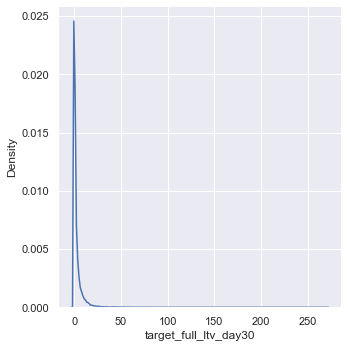

In [19]:
plt.figure(figsize=(10,5))
sns.displot(data = df_oh, x = 'target_full_ltv_day30', kind="kde")
plt.show()

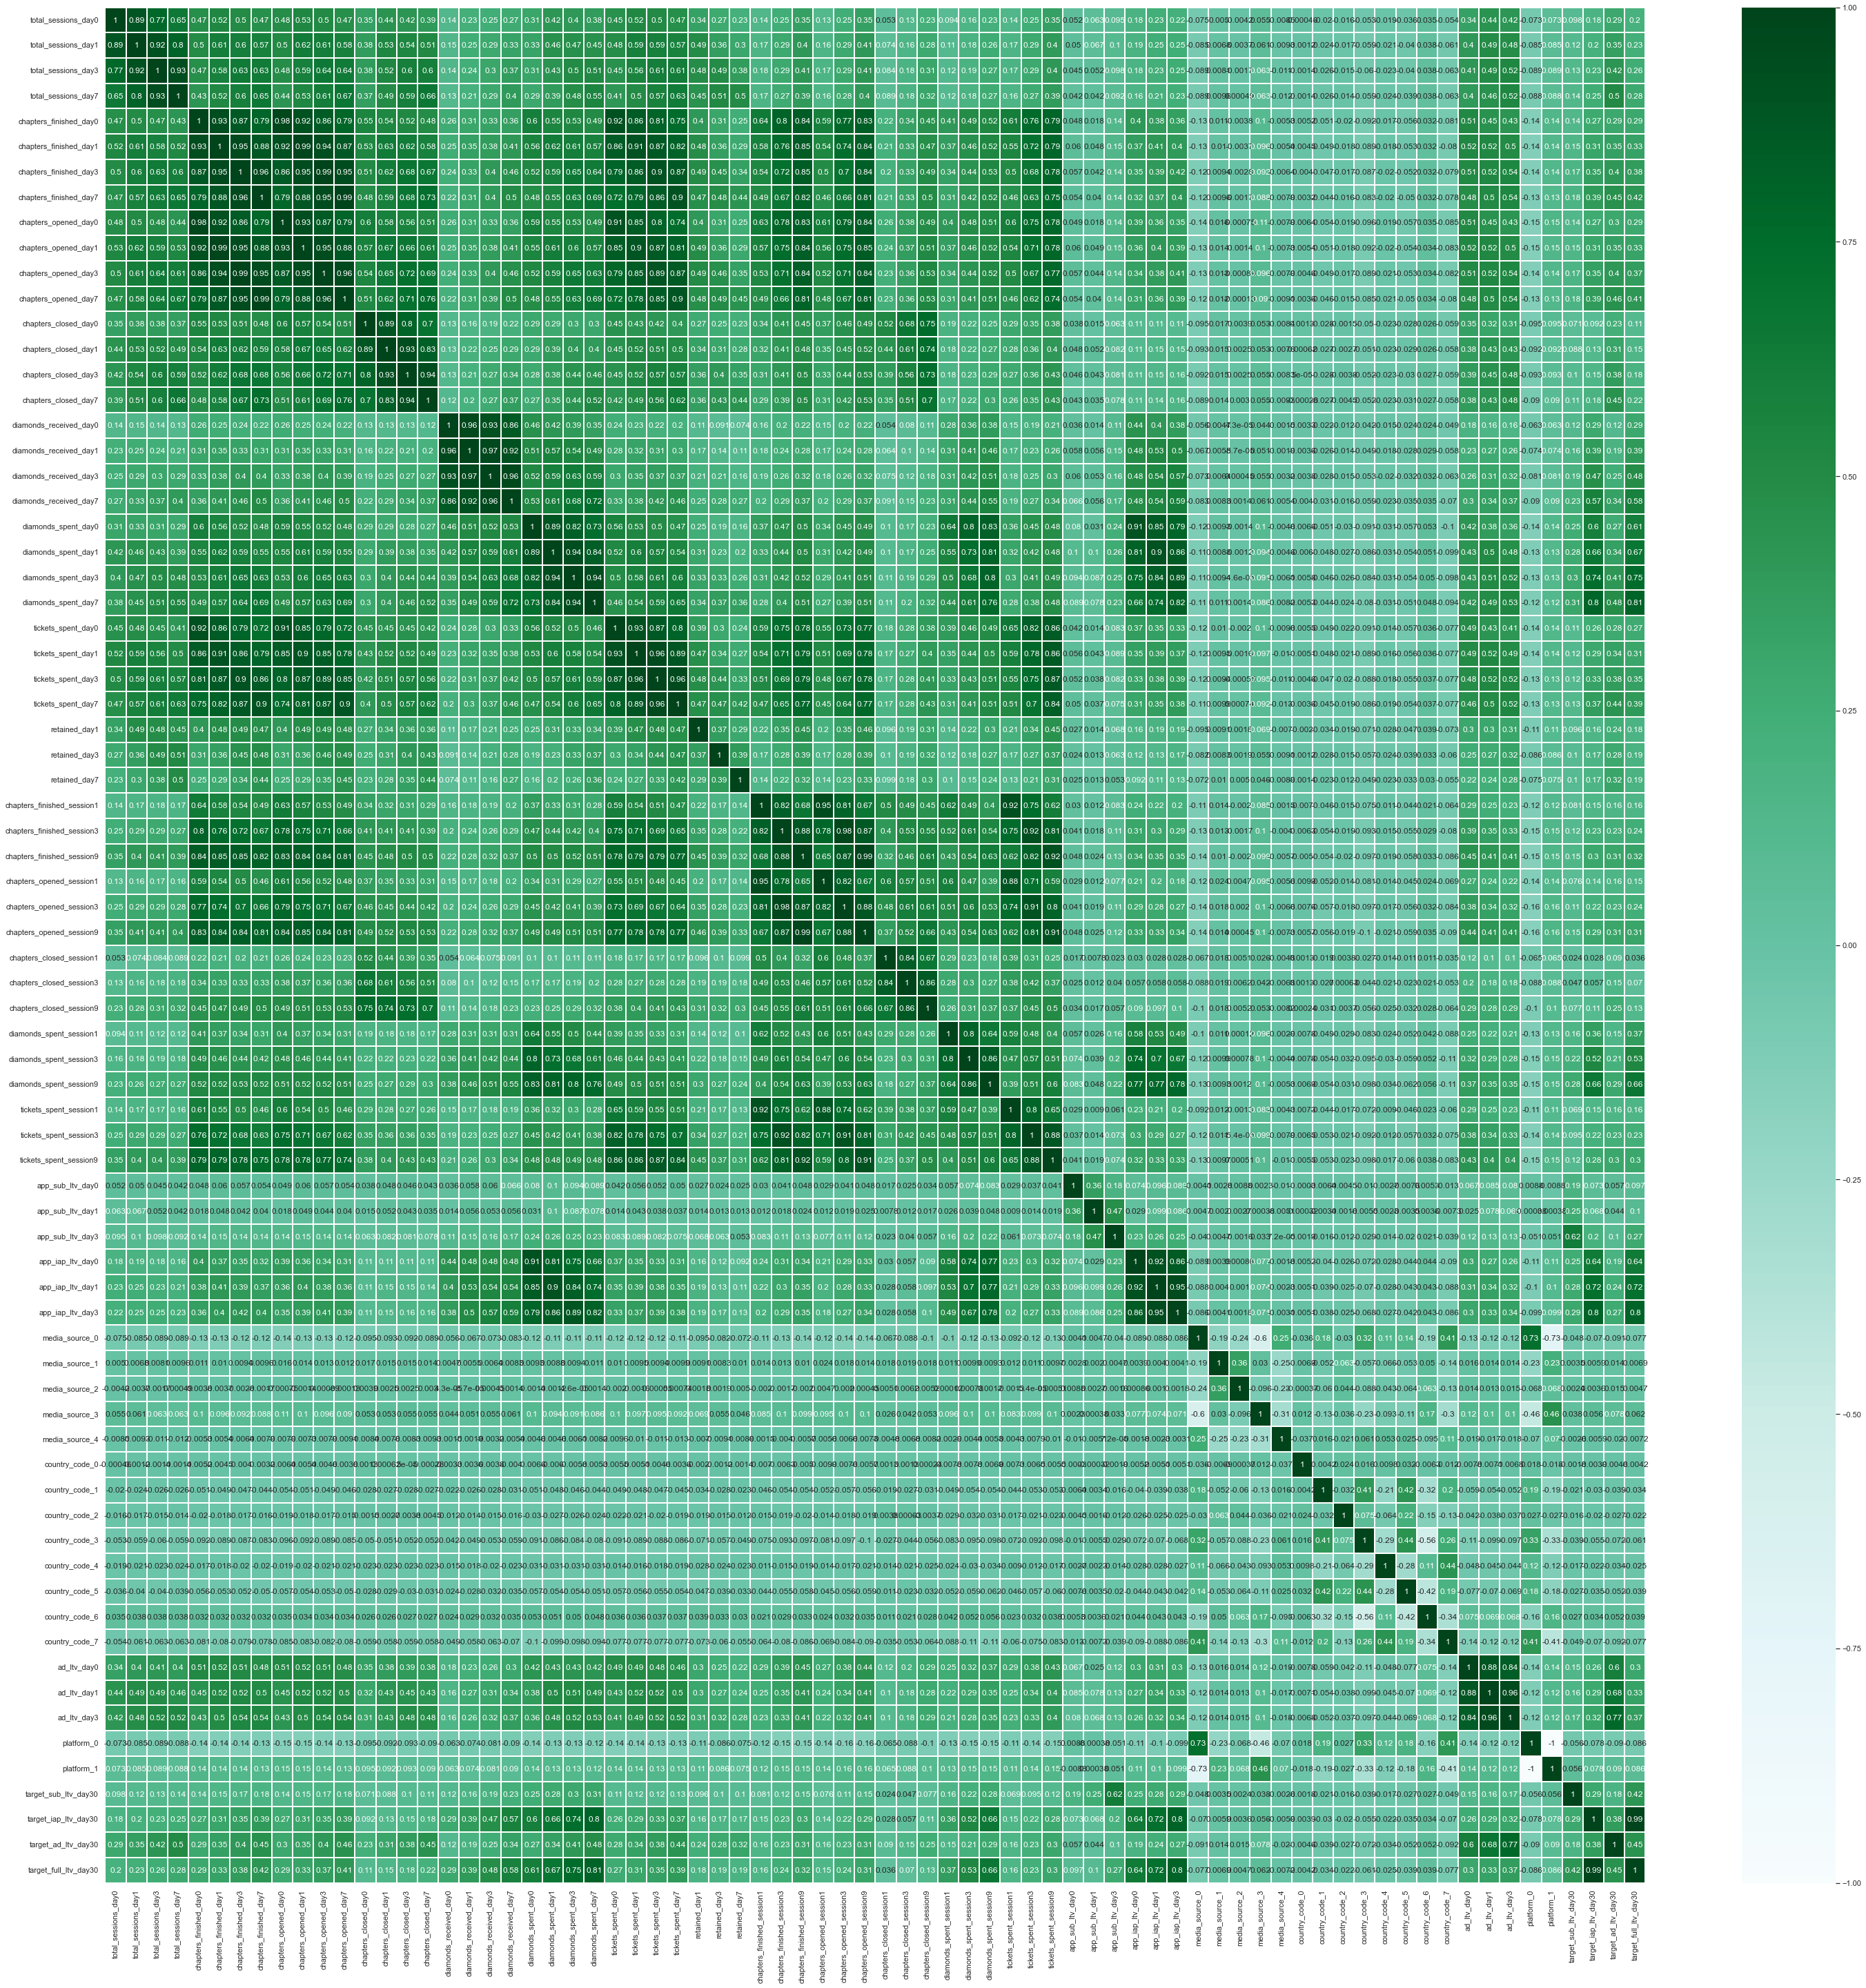

In [20]:
plt.figure(figsize=(50, 50))
sns.heatmap(df_oh.corr(), cmap = 'BuGn', linewidth =.005, annot = True)
plt.show()

In [21]:
def draw_scatter(y_col, x_col):
    plt.figure(figsize = (10,5))
    plt.scatter(df_oh[x_col], df_oh[y_col])
    plt.ylabel(y_col)
    plt.xlabel(x_col)
    plt.show()

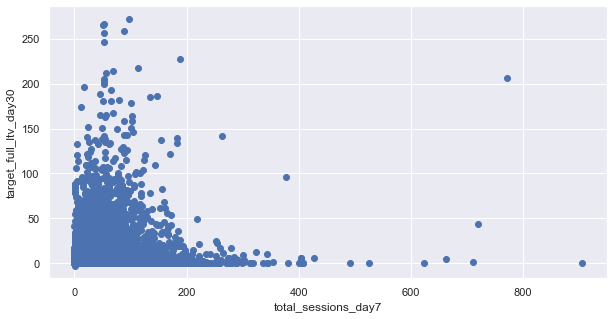

In [22]:
draw_scatter("target_full_ltv_day30", "total_sessions_day7")

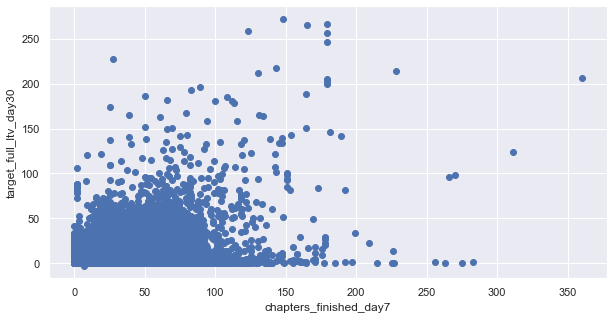

In [23]:
draw_scatter("target_full_ltv_day30", "chapters_finished_day7")

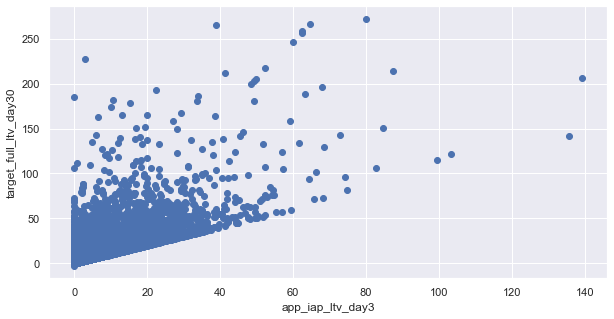

In [24]:
draw_scatter("target_full_ltv_day30", "app_iap_ltv_day3")

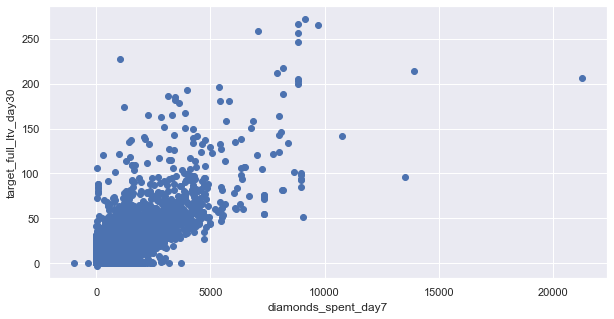

In [25]:
draw_scatter("target_full_ltv_day30", "diamonds_spent_day7")

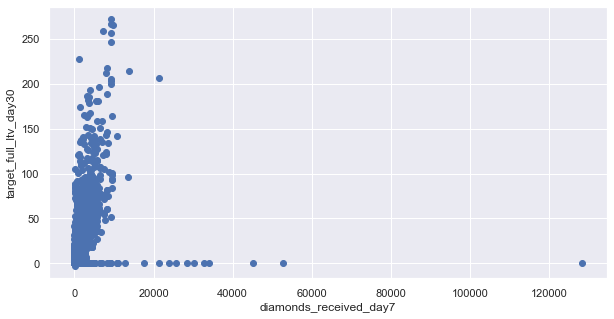

In [26]:
draw_scatter("target_full_ltv_day30", "diamonds_received_day7")

In [27]:
df_ios = df.loc[df['platform'] == "ios"]
df_ios['target_full_ltv_day30'].mean()

0.4978292107019058

In [28]:
df_android = df.loc[df['platform'] == "android"]
df_android['target_full_ltv_day30'].mean()

0.09927940742984764

In [29]:
def draw_boxplot(df, col):
    df_sort = df.sort_values(by = col, ascending=True)
    plt.figure(figsize=(35,10))
    sns.boxplot(data=df_sort, x=col, y="target_full_ltv_day30")
    plt.ylabel("target_full_ltv_day30")
    plt.xlabel(col)
    plt.xticks(rotation = 60)
    plt.show()


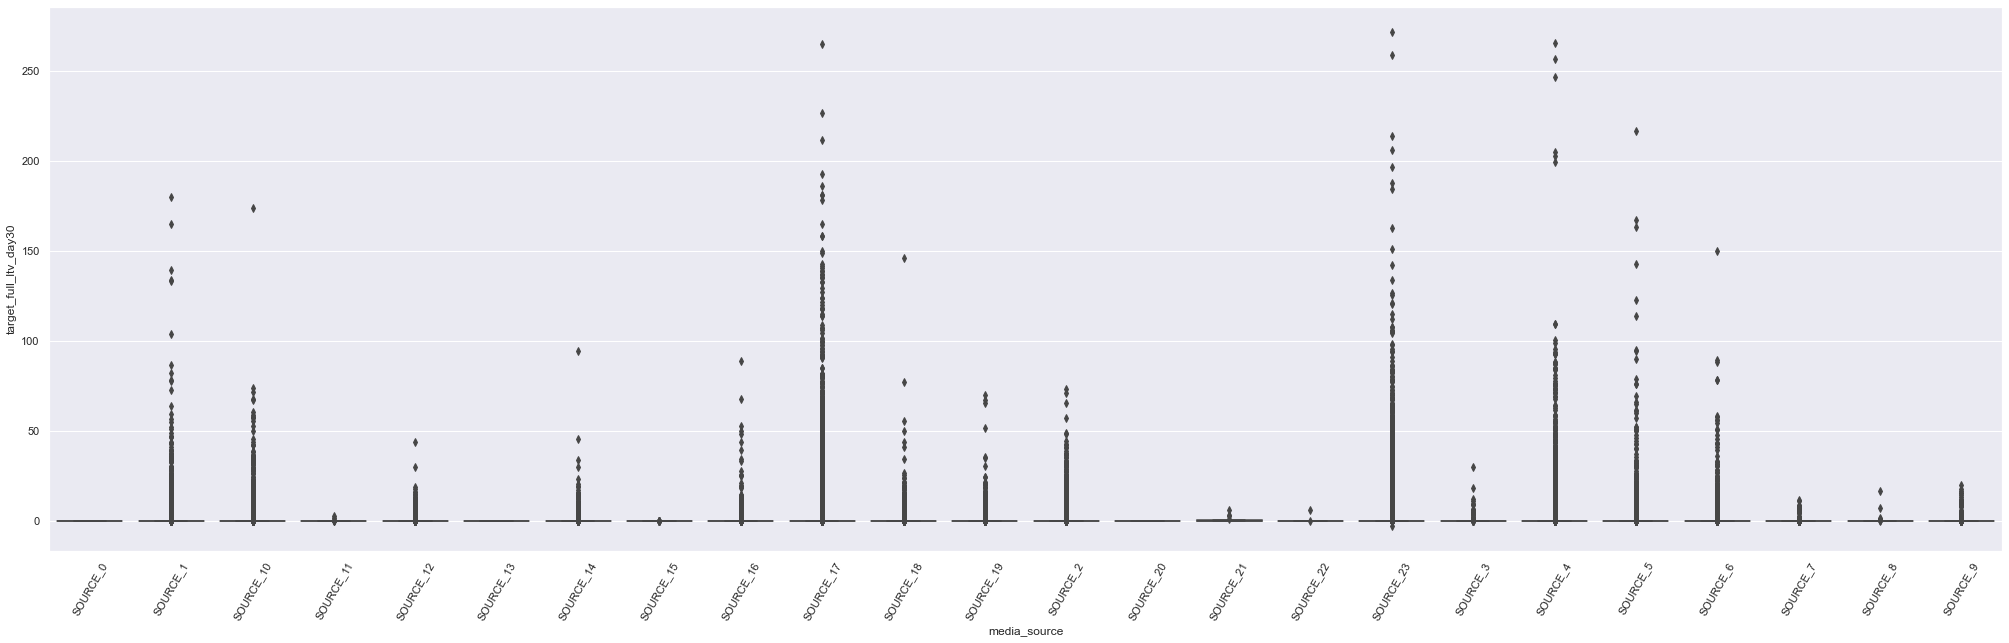

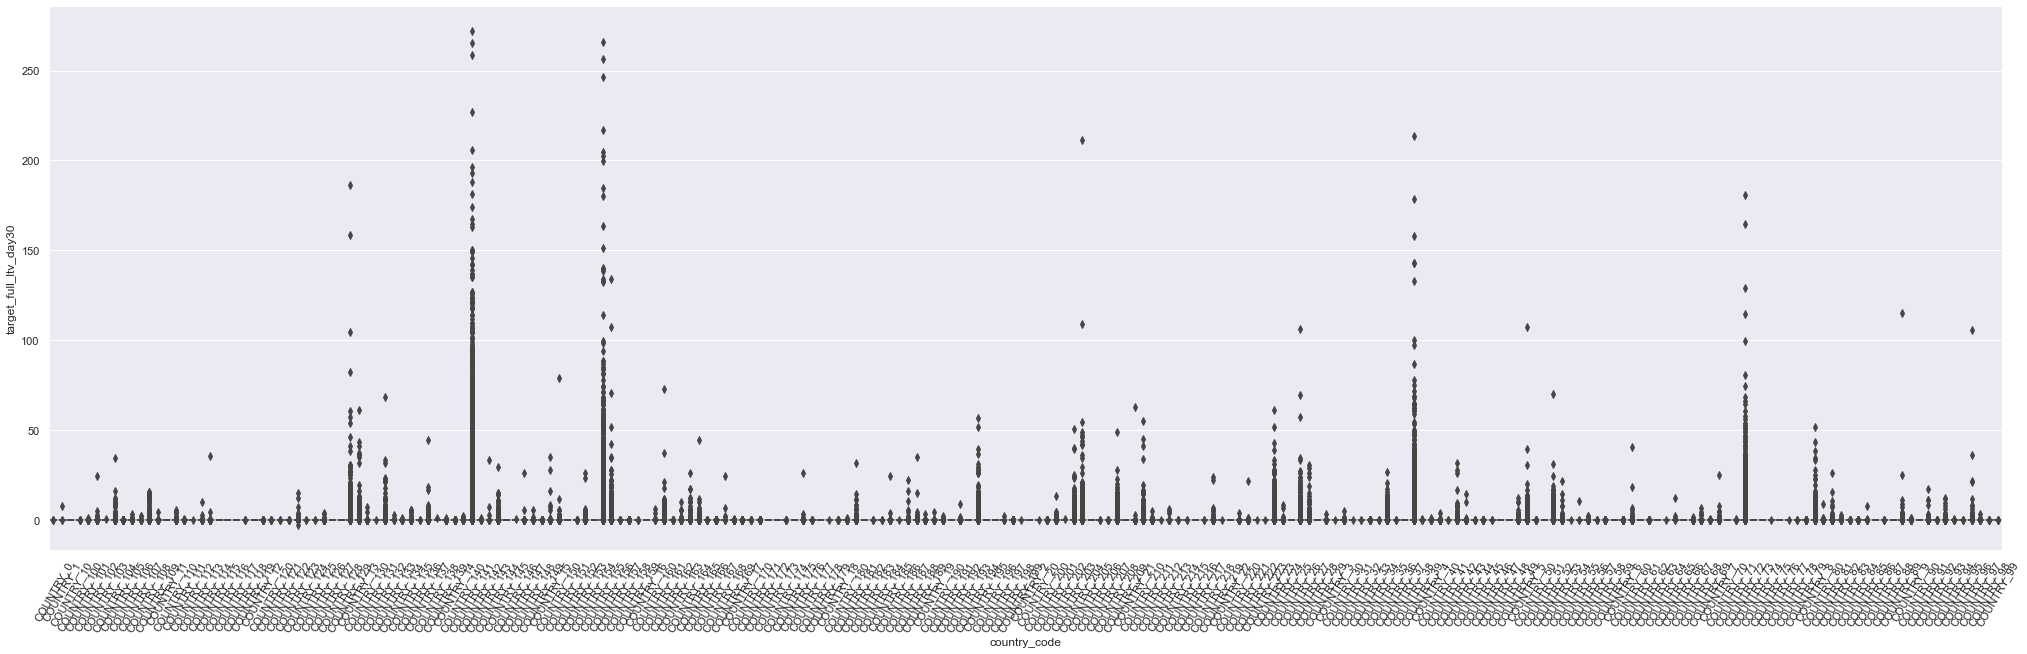

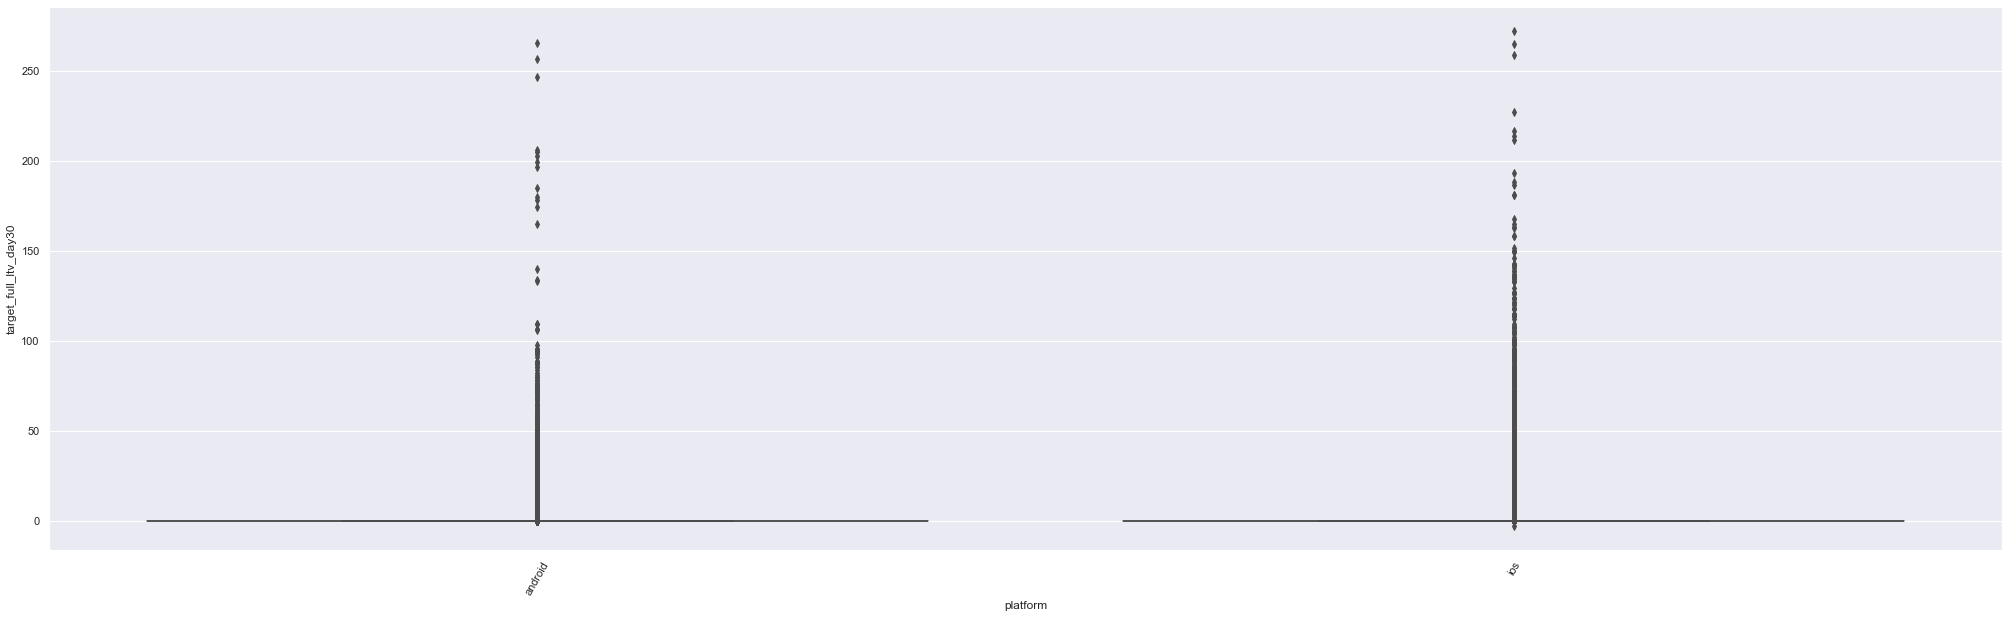

In [30]:
for cat_var in cat_vars:    
    draw_boxplot(df, cat_var)

In [24]:
X = df_oh.drop(['target_sub_ltv_day30', "target_iap_ltv_day30", "target_ad_ltv_day30", "target_full_ltv_day30", "install_date", "retained_day3", "retained_day7", "retained_day1"], axis=1)
Y = df_oh['target_full_ltv_day30']

In [9]:
def errors(Y_test, y_pred):
    print(f"MAE: {mean_absolute_error(Y_test, y_pred)}")
    print(f"RMSE: {mean_squared_error(Y_test, y_pred, squared=False)}")
    print(f"MAPE: {mean_absolute_percentage_error(Y_test, y_pred)}")

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = X[num_vars]
features = scaler.fit_transform(features.values)
X[num_vars] = features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1174265, 70), (293567, 70), (1174265,), (293567,))

In [43]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
print(lr.score(X_test, Y_test))
errors(Y_test, y_pred)

0.7840220049902128
MAE: 0.13434846927171817
RMSE: 0.9931922967452421
MAPE: 106479838138152.34


Feature: 0, Score: -0.00267
Feature: 1, Score: 0.02924
Feature: 2, Score: 0.16351
Feature: 3, Score: -0.23994
Feature: 4, Score: 0.03612
Feature: 5, Score: 0.04188
Feature: 6, Score: 0.46221
Feature: 7, Score: -0.48579
Feature: 8, Score: -0.03948
Feature: 9, Score: -0.23183
Feature: 10, Score: -0.04161
Feature: 11, Score: 0.18010
Feature: 12, Score: 0.01000
Feature: 13, Score: 0.03917
Feature: 14, Score: 0.31077
Feature: 15, Score: -0.45171
Feature: 16, Score: 0.00980
Feature: 17, Score: 0.47517
Feature: 18, Score: -1.40931
Feature: 19, Score: 1.02314
Feature: 20, Score: -0.03549
Feature: 21, Score: 0.01081
Feature: 22, Score: -1.95696
Feature: 23, Score: 2.29993
Feature: 24, Score: -0.01533
Feature: 25, Score: 0.17902
Feature: 26, Score: -0.18039
Feature: 27, Score: 0.03000
Feature: 28, Score: -0.03306
Feature: 29, Score: -0.05656
Feature: 30, Score: -0.06955
Feature: 31, Score: -0.05931
Feature: 32, Score: 0.08023
Feature: 33, Score: -0.24169
Feature: 34, Score: -0.00076
Feature: 35,

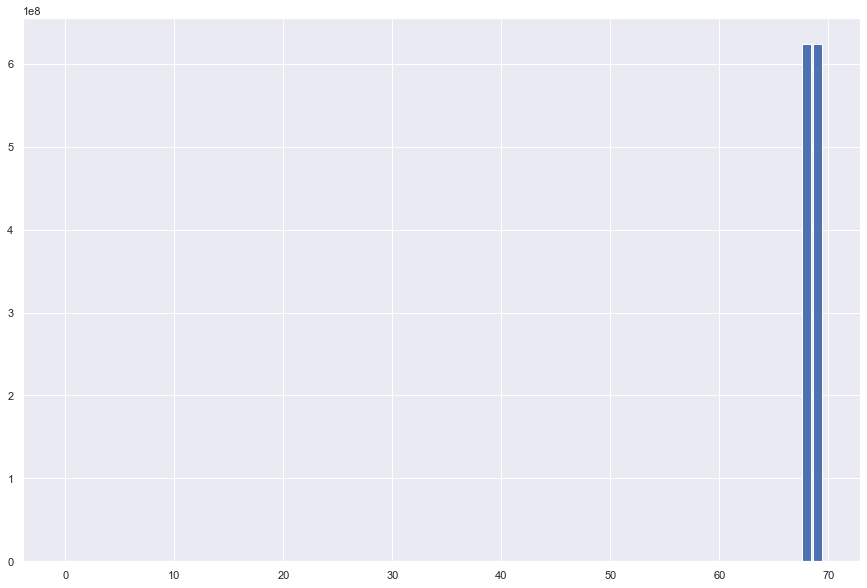

In [46]:
importance = lr.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0, n_jobs = 3, verbose = 3, max_features = 10)

In [49]:
regressor.fit(X_train, Y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  2.1min finished


RandomForestRegressor(max_features=10, n_estimators=20, n_jobs=3,
                      random_state=0, verbose=3)

In [50]:
Y_pred = regressor.predict(X_test)
errors(Y_test, Y_pred)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


MAE: 0.07928980774328898
RMSE: 0.9634695773713053
MAPE: 8080333338376.472


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    1.3s finished


In [51]:
regressor.score(X_test, Y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    1.5s finished


0.7967554859756175

In [52]:
r2_score(Y_pred, Y_test)

0.7664601259883319

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
gbm = GradientBoostingRegressor(verbose=2)
gbm.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           4.6004           15.78m
         2           4.0122           14.30m
         3           3.5249           13.84m
         4           3.1236           13.36m
         5           2.7971           13.06m
         6           2.5243           13.02m
         7           2.2994           13.13m
         8           2.1092           13.28m
         9           1.9537           14.23m
        10           1.8213           15.15m
        11           1.7141           15.42m
        12           1.6244           15.75m
        13           1.5466           16.12m
        14           1.4837           16.17m
        15           1.4276           16.26m
        16           1.3802           16.30m
        17           1.3401           16.30m
        18           1.3033           16.13m
        19           1.2718           16.00m
        20           1.2416           15.86m
        21           1.2174           15.55m
        2

GradientBoostingRegressor(verbose=2)

In [55]:
y_pred = gbm.predict(X_test)

In [56]:
r2_score(y_pred, Y_test)

0.7406198843762579

In [57]:
gbm.score(X_test, Y_test)

0.7805304045154069

In [58]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.5,0.8]
             }

In [59]:
gbm_model = GradientBoostingRegressor()

In [60]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 5, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, Y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, Y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
gbm_tuned_score = np.sqrt(mean_squared_error(Y_test, y_pred))
gbm_tuned_score

In [11]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor(verbose=2)

c:\Users\Iliya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [12]:
est.fit(X_train, Y_train)

Binning 0.592 GB of training data: 4.708 s
Binning 0.066 GB of validation data: 0.351 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 10, train loss: 2.25043, val loss: 2.76693, in 0.399s
[2/100] 1 tree, 31 leaves, max depth = 10, train loss: 1.95620, val loss: 2.45134, in 0.358s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 1.71899, val loss: 2.18816, in 0.458s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.52073, val loss: 1.96418, in 0.328s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.35743, val loss: 1.78424, in 0.386s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.22384, val loss: 1.64181, in 0.362s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.11831, val loss: 1.52147, in 0.333s
[8/100] 1 tree, 31 leaves, max depth = 10, train loss: 1.02616, val loss: 1.41930, in 0.342s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.94672, val loss: 1.32465, in 0.296s
[10/100] 1 tree, 31 leaves, max depth = 9, tra

HistGradientBoostingRegressor(verbose=2)

In [13]:
y_pred = est.predict(X_test)

In [14]:
r2_score(y_pred, Y_test)

0.6876404005998349

In [15]:
est.score(X_test, Y_test)

0.7483874964568056

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
br = BaggingRegressor(base_estimator=xgb.XGBRegressor(verbosity=2), verbose=2)

In [18]:
br.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
[22:04:45] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[22:04:48] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:04:50] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[22:04:53] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[22:04:56] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[22:04:58] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.0min finished


BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
       

In [19]:
y_pred = br.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished


In [20]:
errors(Y_test, y_pred)

MAE: 0.0762135915065472
RMSE: 0.9391439301029267
MAPE: 11190218579489.527


In [21]:
br.score(X_test, Y_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s finished


0.8068889469868081

In [23]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(br, open(filename, 'wb'))